In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Data inspection

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4431872/4422102 [==============================] - 9s 2us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

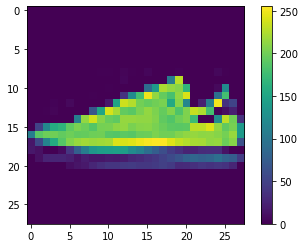

In [9]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

## Data preprocessing

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Model

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 2s 939us/step - loss: 0.2301 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 2s 894us/step - loss: 0.2237 - accuracy: 0.9176
Epoch 3/10
1875/1875 [==============================] - 2s 964us/step - loss: 0.2170 - accuracy: 0.9198
Epoch 4/10
1875/1875 [==============================] - 2s 904us/step - loss: 0.2095 - accuracy: 0.9213
Epoch 5/10
1875/1875 [==============================] - 2s 892us/step - loss: 0.2034 - accuracy: 0.9224
Epoch 6/10
1875/1875 [==============================] - 2s 901us/step - loss: 0.1976 - accuracy: 0.9265
Epoch 7/10
1875/1875 [==============================] - 2s 903us/step - loss: 0.1920 - accuracy: 0.9276
Epoch 8/10
1875/1875 [==============================] - 2s 890us/step - loss: 0.1882 - accuracy: 0.9292
Epoch 9/10
1875/1875 [==============================] - 2s 903us/step - loss: 0.1842 - accuracy: 0.9311
Epoch 10/10
1875/1875 [==============================] - 2s 917u

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 877us/step - loss: 0.3623 - accuracy: 0.8832
Test accuracy: 0.8831999897956848


## Prediction

In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([1.2740537e-07, 1.2010214e-14, 9.7704171e-12, 3.5615882e-14,
       9.7535997e-09, 3.0265644e-04, 2.8652292e-11, 7.3073045e-03,
       3.0802454e-11, 9.9238986e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

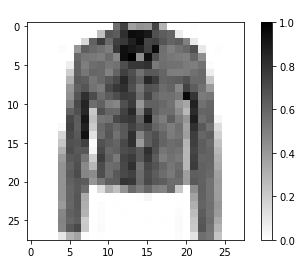

In [27]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        else:
            print("Try again...")

# num = get_number()
num = 10
image = test_images[num]
label = test_labels[num]
predict(model, image, label)